---
# PHY426 Practical 6
---

This practical includes **processing of digital signals using Fast Fourier Transform**. This may sound boring at first, but you will have some fun today before reading week...

There will be no assignment and you are welcome to work with a partner. Please complete all the steps of the today's practical. Read the explanations and run the cells one by one. Connect the headphones into the slot of your iMac Desktop (on the back panel) to hear the sound.

This practical describes how to perform some basic sound processing functions in Python. We’ll be using the `numpy` and `matplotlib` for data analysis and `scipy` to import/export wav files.

We’ll begin by importing the necessary packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline

Some magic to see better quality graphs.

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

Next we read in a wav file. The file is already in your folder. It contains a note **A3#** played by piano and recorded with digital microphone. As some of you may know, the fundamental frequency (F0) of this note is **233.8 Hz**. At this link you can find a table with fundamental frequencies of different notes: http://pages.mtu.edu/~suits/notefreqs.html 

In [24]:
sampFreq, sound = wavfile.read('unknown.wav')

You can download the file to your computer and play it with iTunes. You can hear the characteristic background noise of a low frequency. We will try to remove this noise from the signal and obtain a clearer sound. 


### Digital sound
When you hear a sound your ear's membrane oscillates because the density and pressure of the air in close proximity to the ear oscillate as well. Thus, sound recordings contain the relative signal of these oscilations. Digital audio is sound that has been recorded in, or converted into, digital form. In digital audio, the sound wave of the audio signal is encoded as numerical samples in continuous sequence. For example, in CD (or WAV) audio, samples are taken 44100 times per second each with 16 bit sample depth, i.e. there are 2^16 = 65536 possible values of the signal: from -32768 to 32767. For the example below, a sound wave, in red, represented digitally, in blue (after sampling and 4-bit quantization).

![fig1](4-bit-linear-PCM.svg.png)

Typically, stereo **wav**-file contains two arrays of integers: for the right and left channel (for your right and left speaker) respectively. 

The `scipy.io.wavfile.read()` function reads wav files as `int16` (for 16-bit wavs) or `int32` (for 32-bit wavs), 24-bit wav files are not supported. We can check the type of the sound as follows:

In [25]:
sound.dtype, sampFreq

(dtype('int16'), 44100)

This means that the sound pressure values are mapped to integer values that can range from -2^15 to (2^15)-1. The samples are taken 44100 times per second.

We can convert our sound (numpy) array to floating point values ranging from -1 to 1 as follows:

In [26]:
sound = sound / 2.0**15

Now let's see the shape of the sound array. The wav file has two channels and 45568 sample points

In [27]:
sound.shape

(21888, 2)

Considering the sampling rate (sampFreq = 44110) this corresponds to a duration of around 1.03 seconds

In [28]:
length_in_s = sound.shape[0] / sampFreq
print(length_in_s)

0.4963265306122449


### Plotting the sound signal on each channel

A time representation of the sound can be obtained by plotting the pressure values against the time axis. 

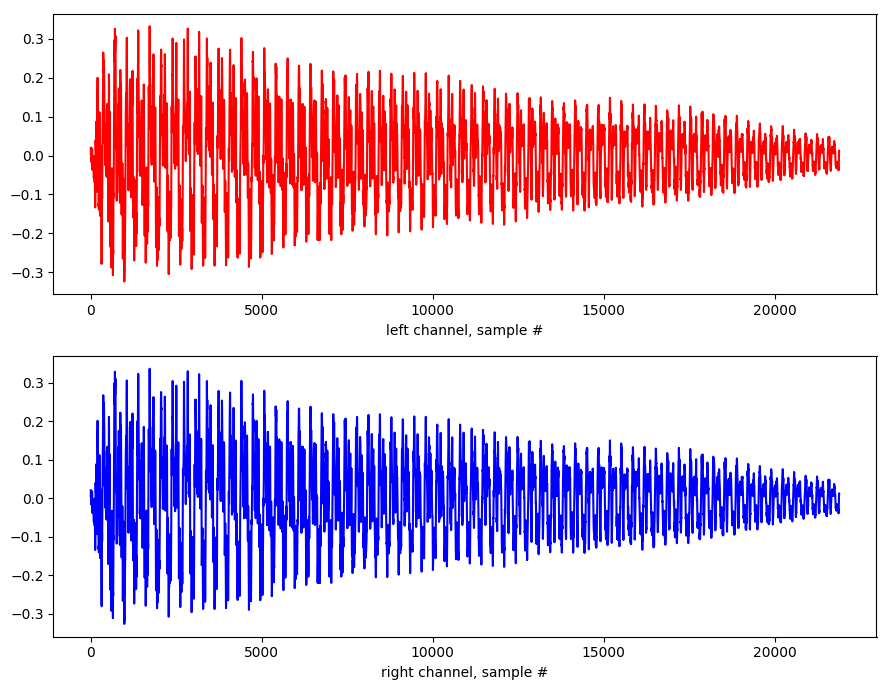

In [29]:
plt.subplot(2,1,1)
plt.plot(sound[:,0], 'r')
plt.xlabel("left channel, sample #")
plt.subplot(2,1,2)
plt.plot(sound[:,1], 'b')
plt.xlabel("right channel, sample #")
plt.tight_layout()
plt.show()

However, we need to create an array containing the time points first. To get the proper time on the x-axis we have to generate a numpy array using sampFreq:

In [30]:
time = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s

Now let's look at the proper axis titles: 

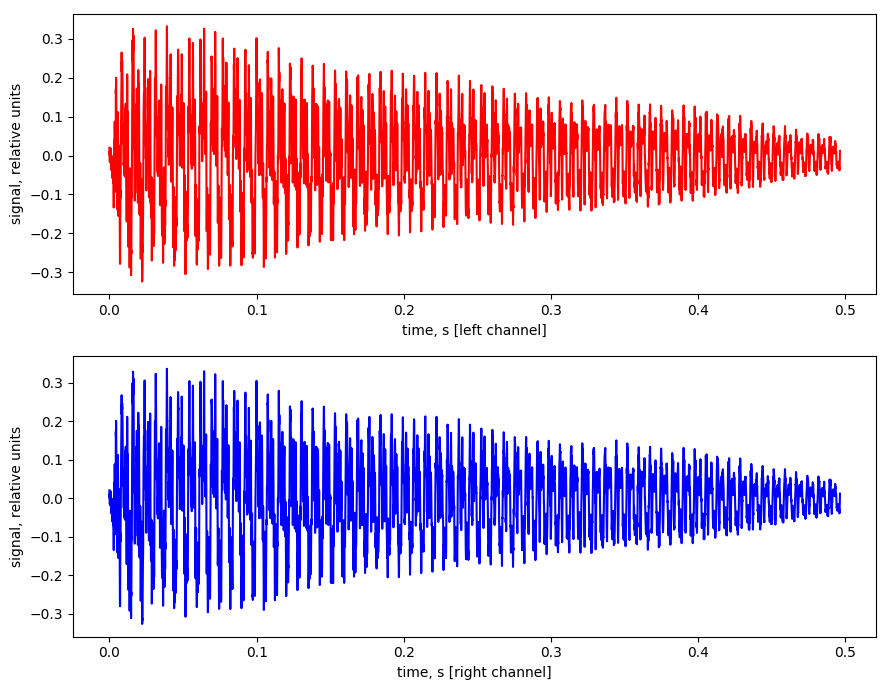

In [31]:
plt.subplot(2,1,1)
plt.plot(time, sound[:,0], 'r')
plt.xlabel("time, s [left channel]")
plt.ylabel("signal, relative units")
plt.subplot(2,1,2)
plt.plot(time, sound[:,1], 'b')
plt.xlabel("time, s [right channel]")
plt.ylabel("signal, relative units")
plt.tight_layout()
plt.show()

We will select and work with only one of the channels from now on

In [32]:
signal = sound[:,0]

We see a lot of oscillations and it's all pretty messy. We want to look at the sound with a higher resolution:

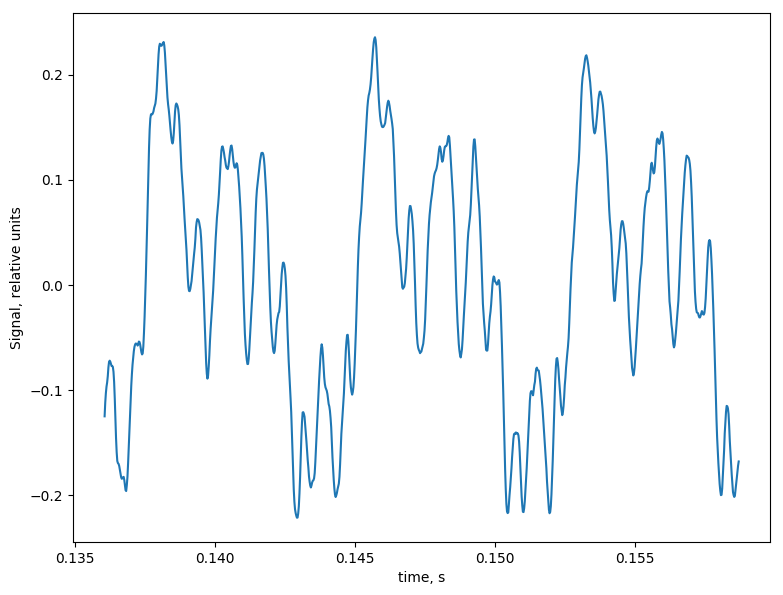

In [33]:
plt.plot(time[6000:7000], signal[6000:7000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

Yes, this is how your ear membrane oscillates on a microsecond timescale ;-)

### Plotting the frequency content with FT
Another useful graphical representation is that of the frequency content, or spectrum of the note. The standard way of doing that is with a **discrete Fourier transform** (https://en.wikipedia.org/wiki/Discrete_Fourier_transform) using the **fast Fourier transform** (https://en.wikipedia.org/wiki/Fast_Fourier_transform) or FFT algorithm. Basically, we take a sound signal and isolate the frequencies of sine waves that make up that sound.

![fig2](Fourier-transform.gif)

So we are going to use the `np.fft.rfft()` function. This is meant for data that doesn’t contain complex numbers only real numbers. The function `np.fft.rfftfreq()` always goes together with `np.fft.rfft()` because it gives the way to obtain the proper frequency units:

In [34]:
fft_spectrum = np.fft.rfft(signal)
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)

The FFT of the data is usually complex:

In [35]:
fft_spectrum

array([-2.60409546+0.j        , -1.98799474-0.08260352j,
       -1.29800022-0.04377297j, ..., -0.00599742+0.02087554j,
        0.0282337 -0.01227875j, -0.04476929+0.j        ])

To simplify the concept without going deeply into the theorical part, let's say that when we performe the fft to get `X = fft(x)`, we usually need to use the signal magnitude in the spectral domain: `A = |X| = sqrt(real(X)^2+ imag(X)^2)`. As for the imaginary part of the transform, it can be used to compute the signal phase: `Phi = Arg(X) = arctg(imag(X)/real(X))`. Today we do not need the phase part. So, to obtain the Amplitude vs. Frequency spectrum we find the absolute value of the fourier transform:

In [36]:
fft_spectrum_abs = np.abs(fft_spectrum)

Thus, the spectrum of the sound (frequency domain) looks like:

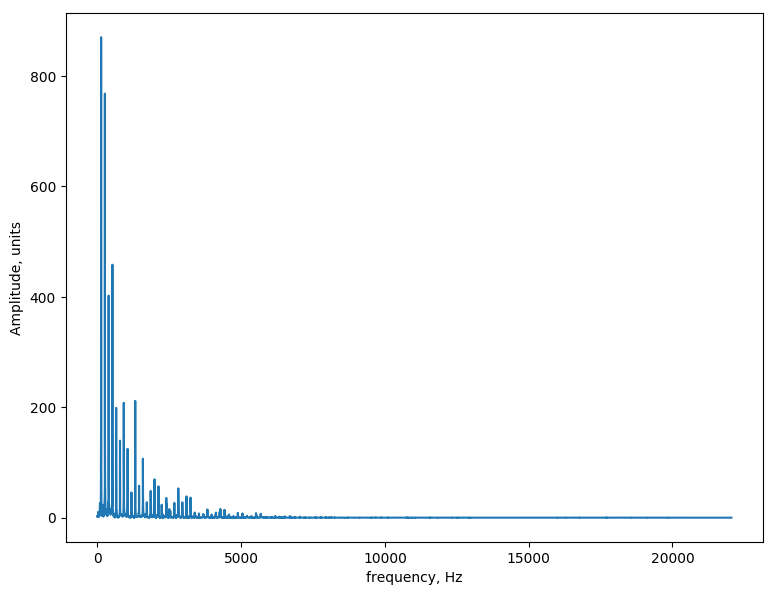

In [37]:
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

A human can hear a sound that is in the 20-20,000 Hz range. However, our sound doesn't contain frequencies greater than 3 kHz. It's interesting. Let's zoom in on the highest peaks:

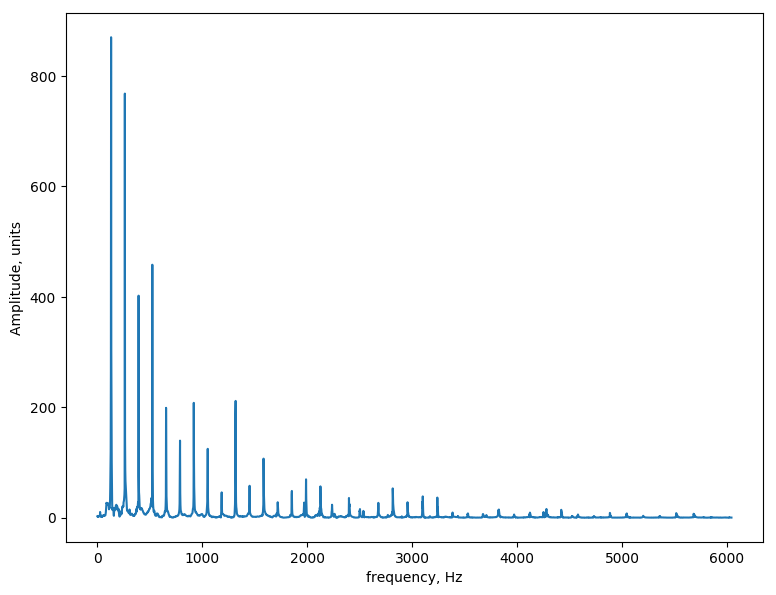

In [38]:
plt.plot(freq[:3000], fft_spectrum_abs[:3000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

We see a lot of equally spaced peaks, and the distance between them is ~235 Hz. Let's zoom in even more:

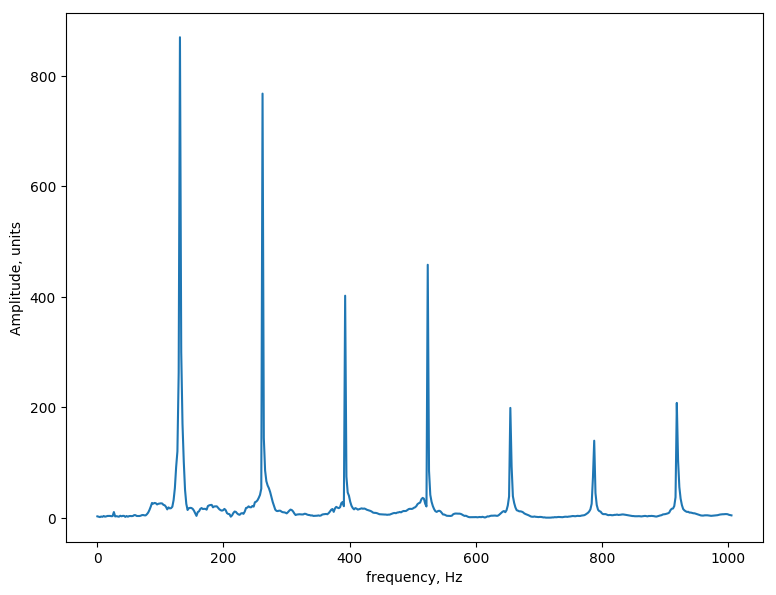

In [39]:
plt.plot(freq[:500], fft_spectrum_abs[:500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.arrow(90, 5500, -20, 1000, width=2, head_width=8, head_length=200, fc='k', ec='k')
plt.arrow(200, 4000, 20, -1000, width=2, head_width=8, head_length=200, fc='g', ec='g')
plt.show()

The plot shows one big spike at and around 60 Hz (black arrow). This is the frequency standard used for AC (Alternating Current) in North America where, probably, the recording was made, and it is very noticable when you play a sound. In Europe, for example, the standard frequency is 50 Hz.

This effect is called **electric hum** (details https://en.wikipedia.org/wiki/Mains_hum). In short, because of ubiquitous AC electromagnetic fields from nearby appliances and wiring, 60 Hz electrical noise can get into audio systems. This reaches the microphone and is recorded. When recording using the built-in microphone on a laptop, a good way to prevent this is to disconnect the battery charger when recording.

The second highest peak is called a fundamental frequency (green arrow) - and it's near **233 Hz**. The other spikes are called overtone harmonics and are multiples of the fundamental frequency. We see that except 60 Hz noise, there are spikes around 233 Hz, 465 Hz, 698 Hz, 932 Hz, 1167 Hz, 1401 Hz and 1638 Hz (all are multiples of ~233 Hz). 

For music lovers: our sound is a **semitone A** of the third octave (or **A3#**) geneated by piano. Let's look at all the peaks more thoroughly:

In [40]:
for i,f in enumerate(fft_spectrum_abs):
    if f > 200: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],1),  np.round(f)))

frequency = 128.9 Hz with amplitude 263.0 
frequency = 131.0 Hz with amplitude 870.0 
frequency = 133.0 Hz with amplitude 300.0 
frequency = 261.9 Hz with amplitude 768.0 
frequency = 392.9 Hz with amplitude 402.0 
frequency = 523.8 Hz with amplitude 458.0 
frequency = 918.8 Hz with amplitude 208.0 
frequency = 1317.7 Hz with amplitude 211.0 


The way to filter the electric hum sound is to set the amplitudes of the FFT values around 60 Hz to 0, see (1) in the code below. In addition to filtering this peak, we're also going to remove the frequencies below the human hearing range and above the normal human voice range (2).

In [20]:
for i,f in enumerate(freq):
    if f < 62 and f > 58:# (1)
        fft_spectrum[i] = 0.0
    if f < 21 or f > 20000:# (2)
        fft_spectrum[i] = 0.0

Let's look again on the spectrum. 

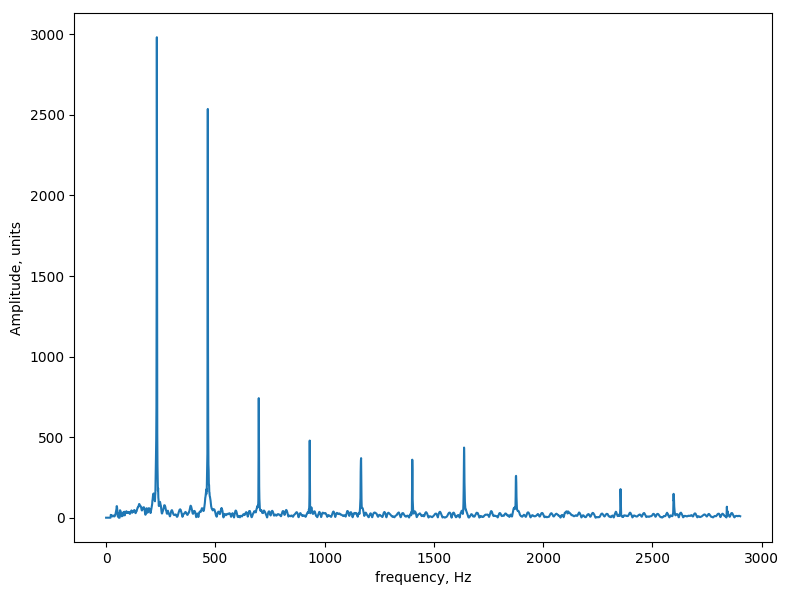

In [21]:
plt.plot(freq[:3000], np.abs(fft_spectrum[:3000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

We see no spikes in the 60 Hz region. Then we recreate the original signal via an inverse FFT:

In [22]:
noiseless_signal = np.fft.irfft(fft_spectrum)

Let's save the noiseless sound in a file, download it from the jupyterhub folder and play it in iTunes (can you hear a difference?):

In [23]:
wavfile.write("noiseless_a3s.wav", sampFreq, noiseless_signal)

## Problem 1. 

In your folder there is a wav-file called `unknown.wav`. This is the sound of a note played on a piano and recorded without AC noise. You have to find the fundamental frequency and determine the note, using the table http://pages.mtu.edu/~suits/notefreqs.html, materials from today's practical and any possible Internet resources.

## Problem 2. 

In the `unknown.wav` find the fundamental frequency and remove all the overtones form the Fourier spectrum. Restore the original sound, save it with the filename `no_overtones.wav` and play the sound in iTunes to hear if you like it. Think about why overtones, physically, is the important part of string instruments. Hint: https://en.wikipedia.org/wiki/Overtone#String_instruments